**Deskripsi Proyek**

- Dalam usaha untuk mengoptimalkan biaya produksi, pabrik baja Steelproof pada akhirnya memutuskan untuk mengurangi penggunaan konsumsi energi pada tahap pemrosesan baja. Dengan demikian untuk membantu keputusan tersebut perusahaan menugaskan kepada kita untuk membuat dan mengembangkan model machine learning yang dapat memprediksi suhu logam.
- Untuk membuat model yang baik kita juga harus memahami langkah-langkah pemrosesan baja tersebut, berikut adalah uraian secara garis besarnya:
  1. Baja diproses dalam corong logam yang memiliki kapasitas sekitar 100 ton. Agar corong mampu menahan suhu yang sangat tinggi, corong tersebut dilapisi dengan batu tahan api dibagian dalamnya. Kemudian baja cair dituangkan ke dalam corong dan dipanaskan hingga suhu yang diinginkan dengan elektroda grafit yang terletak di tutupnya. Elektroda grafit digunakan untuk memanaskan logam dalam corong dengan mengalirkan arus listrik melalui elektroda tersebut.
  2. Sulfur dihilangkan dari logam melalui proses desulfurisasi. Komposisi kimia baja dikoreksi (dengan cara menambahkan paduan dalam bentuk bullion dari bunker bahan curah atau dengan bantuan pengumpan kawat),dan kemudian sampel yang diperlukan diambil.
  3. Sebelum unsur paduan dimasukkan, suhu baja diukur dan komposisi kimianya dianalisis. Suhu kemudian dinaikkan selama beberapa menit, unsur paduan ditambahkan, dan paduannya dibersihkan dengan gas inert. Setelah itu, paduan diaduk da suhunya diukur kembali. Siklus ini diulang sampai komposisi kimia dan suhu peleburan optimal tercapai.
  4. Baja cair kemudian dimurnikan atau ditransfer ke mesin pengecoran kontinu yang mengeras menjadi slab baja.

**Tujuan**

Tujuan dari pekerjaan ini adalah untuk membuat dan mengembangkan model machine learning yang dapat memprediksi suhu logam.

**Data**

Kumpulan data terletak dalam folder final_steel_en.zip dengan path /datasets/final_steel_en/.

**Deskripsi Data**
Data terdiri dari file yang diperoleh dari berbagai sumber:

- 'data_arc.csv' — data elektroda
- 'data_bulk.csv'  — data pasokan bahan curah (volume)
- 'data_bulk_time.csv' — data pengiriman bahan curah (waktu)
- 'data_gas.csv' — data pembilasan gas
- 'data_temp.csv' — hasil pengukuran suhu
- 'data_wire.csv' — data bahan kawat (volume)
- 'data_wire_time.csv' — data bahan kawat (waktu)

Di setiap file, kolom kunci berisi nomor batch.

Mungkin ada beberapa baris dengan nilai 'key' yang sama dalam file-file tersebut.

Nilai-nilai ini sesuai dengan iterasi pemrosesan yang berbeda.

**Dengan Requirements:**
- Target Fitur : suhu terakhir yang diukur
- Metrik : MAE
- Kriteria penilaian :
    - MAE > 8.7 — 0 SP
    - 7.6 < MAE ≤ 8.7 — 4 SP
    - 6.8 < MAE ≤ 7.6 — 4.5 SP
    - 6.3 < MAE ≤ 6.8 — 5 SP
    - 6.0 < MAE ≤ 6.3 — 5.5 SP
    - MAE ≤ 6.0 —  6 SP

## Buka File Data, Pelajari, dan EDA
File path:  /datasets/final_steel_en/

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
# Muat file data
data_arc = pd.read_csv('datasets/final_steel/data_arc_en.csv')
data_bulk = pd.read_csv('datasets/final_steel/data_bulk_en.csv')
data_bulk_time = pd.read_csv('datasets/final_steel/data_bulk_time_en.csv')
data_gas = pd.read_csv('datasets/final_steel/data_gas_en.csv')
data_temp = pd.read_csv('datasets/final_steel/data_temp_en.csv')
data_wire = pd.read_csv('datasets/final_steel/data_wire_en.csv')
data_wire_time = pd.read_csv('datasets/final_steel/data_wire_time_en.csv')

### Data Elektroda (data_arc)

In [ ]:
# Tampilkan sample data
data_arc.head()

,key,Arc heating start,Arc heating end,Active power,Reactive power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [ ]:
# Informasi data
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                14876 non-null  int64  
 1   Arc heating start  14876 non-null  object 
 2   Arc heating end    14876 non-null  object 
 3   Active power       14876 non-null  float64
 4   Reactive power     14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [ ]:
# Mengubah Tipe Data Tanggal dan Waktu
data_arc['Arc heating start'] = pd.to_datetime(data_arc['Arc heating start'])
data_arc['Arc heating end'] = pd.to_datetime(data_arc['Arc heating end'])

In [ ]:
# Cek Duplikasi Data
print('data duplicate', data_arc.duplicated().sum())

data duplicate 0


**Note 'data_arc':**
- Tidak ada missing values
- Tidak ada duplikasi data

                key              Arc heating start  \
count  14876.000000                          14876   
mean    1615.220422  2019-07-02 16:15:28.218203904   
min        1.000000            2019-05-03 11:02:14   
25%      806.000000  2019-06-02 07:01:09.249999872   
50%     1617.000000     2019-06-30 09:57:14.500000   
75%     2429.000000  2019-08-03 13:04:47.750000128   
max     3241.000000            2019-09-01 04:34:47   
std      934.571502                            NaN   

                     Arc heating end  Active power  Reactive power  
count                          14876  14876.000000    14876.000000  
mean   2019-07-02 16:18:19.889150208      0.670441        0.452592  
min              2019-05-03 11:06:02      0.030002     -715.504924  
25%              2019-06-02 07:04:21      0.395297        0.290991  
50%              2019-06-30 10:01:01      0.555517        0.415962  
75%              2019-08-03 13:09:14      0.857034        0.637371  
max              2019-09-01 04

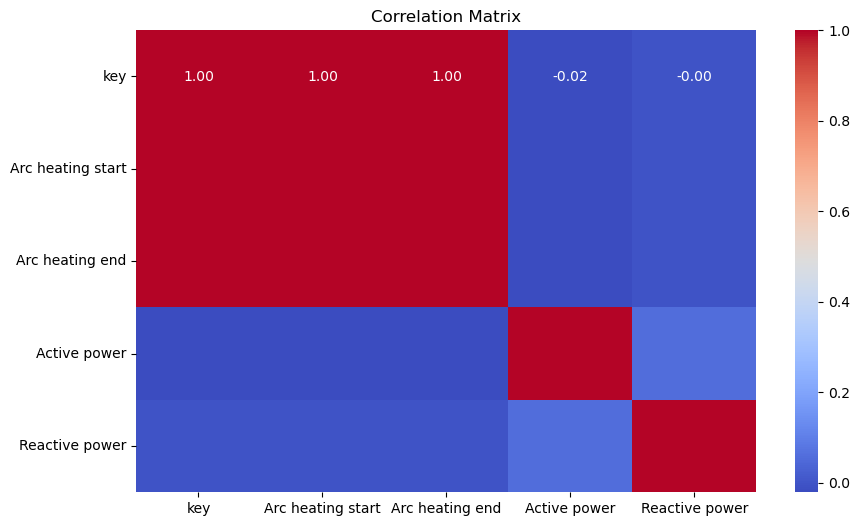

In [ ]:
# Statistik deskriptif untuk data_arc
print(data_arc.describe())
# Korelasi antar fitur
correlation_matrix = data_arc.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Menghitung korelasi antar kolom pada data_arc
correlation_matrix = data_arc.corr()
# Menampilkan matriks korelasi
print(correlation_matrix)

                        key  Arc heating start  Arc heating end  Active power  \
key                1.000000           0.999185         0.999185     -0.021382   
Arc heating start  0.999185           1.000000         1.000000     -0.020953   
Arc heating end    0.999185           1.000000         1.000000     -0.020922   
Active power      -0.021382          -0.020953        -0.020922      1.000000   
Reactive power    -0.004396          -0.004924        -0.004922      0.054437   

                   Reactive power  
key                     -0.004396  
Arc heating start       -0.004924  
Arc heating end         -0.004922  
Active power             0.054437  
Reactive power           1.000000  


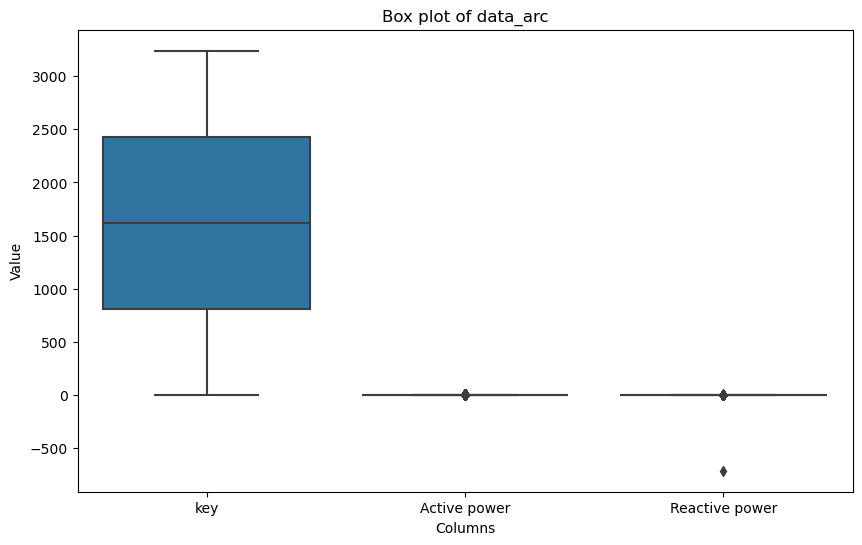

In [ ]:
# Box plot untuk melihat sebaran dan pencilan dalam data_arc
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_arc)
plt.title('Box plot of data_arc')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.show()

In [ ]:
# Pencarian pencilan pada data_arc
Q1 = data_arc.quantile(0.25)
Q3 = data_arc.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_arc[(data_arc < lower_bound) | (data_arc > upper_bound)].count()
print("Jumlah Pencilan:")
print(outliers)

Jumlah Pencilan:
key                    0
Arc heating start      0
Arc heating end        0
Active power         569
Reactive power       601
dtype: int64


In [ ]:
# Handling pencilan pada data_arc
data_arc_no_outliers = data_arc.copy()
for column in data_arc_no_outliers.columns[1:]:
    Q1 = data_arc_no_outliers[column].quantile(0.25)
    Q3 = data_arc_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_arc_no_outliers[column] = data_arc_no_outliers[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

**Note:**
- Antara Arc heating start, Arc heating end, dan key memiliki korelasi yang sangat tinggi (mendekati 1), yang berarti ketiganya berkorelasi kuat. Hal ini masuk akal karena Arc heating start dan Arc heating end berkaitan erat dengan proses pemanasan busur listrik pada suatu titik waktu tertentu (key).
- Terdapat pencilan pada Active power = 569 dan Reactive power = 601

### Data Volume Pasokan Bahan Curah (data_bulk)

In [ ]:
# Tampilkan sample data
data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [ ]:
# Informasi data
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.3 KB


In [ ]:
# Cek Duplikasi Data
print('data duplicate', data_bulk.duplicated().sum())

data duplicate 0


In [ ]:
# Mencari Data yang Hilang
data_bulk.isnull().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [ ]:
# Persentase data yang hilang
(data_bulk.isnull().sum() / len(data_bulk)*100).sort_values()

key         0.000000
Bulk 14    10.322787
Bulk 12    21.700224
Bulk 15    28.155960
Bulk 3     58.517098
Bulk 4     67.593480
Bulk 6     81.591563
Bulk 1     91.946309
Bulk 11    94.343241
Bulk 10    94.375200
Bulk 5     97.539150
Bulk 7     99.201023
Bulk 2     99.296900
Bulk 9     99.392777
Bulk 13    99.424736
Bulk 8     99.968041
dtype: float64

In [ ]:
# Mengganti missing values dengan nilai nol pada data_bulk
data_bulk.fillna(0, inplace=True)

**Note 'data_bulk':**
- Terdapat banyak missing values
- Tidak ada duplikasi data

               key       Bulk 1       Bulk 2       Bulk 3       Bulk 4  \
count  3129.000000  3129.000000  3129.000000  3129.000000  3129.000000   
mean   1624.383509     3.160435     1.779163    47.240332    33.830617   
std     933.337642    11.869164    21.217878    74.239954    56.034505   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     816.000000     0.000000     0.000000     0.000000     0.000000   
50%    1622.000000     0.000000     0.000000     0.000000     0.000000   
75%    2431.000000     0.000000     0.000000    80.000000    68.000000   
max    3241.000000   185.000000   325.000000   454.000000   281.000000   

            Bulk 5       Bulk 6       Bulk 7       Bulk 8       Bulk 9  \
count  3129.000000  3129.000000  3129.000000  3129.000000  3129.000000   
mean      2.633749    21.892298     2.441675     0.015660     0.463407   
std      20.918138    55.492582    31.944063     0.875978     6.154398   
min       0.000000     0.000000     0

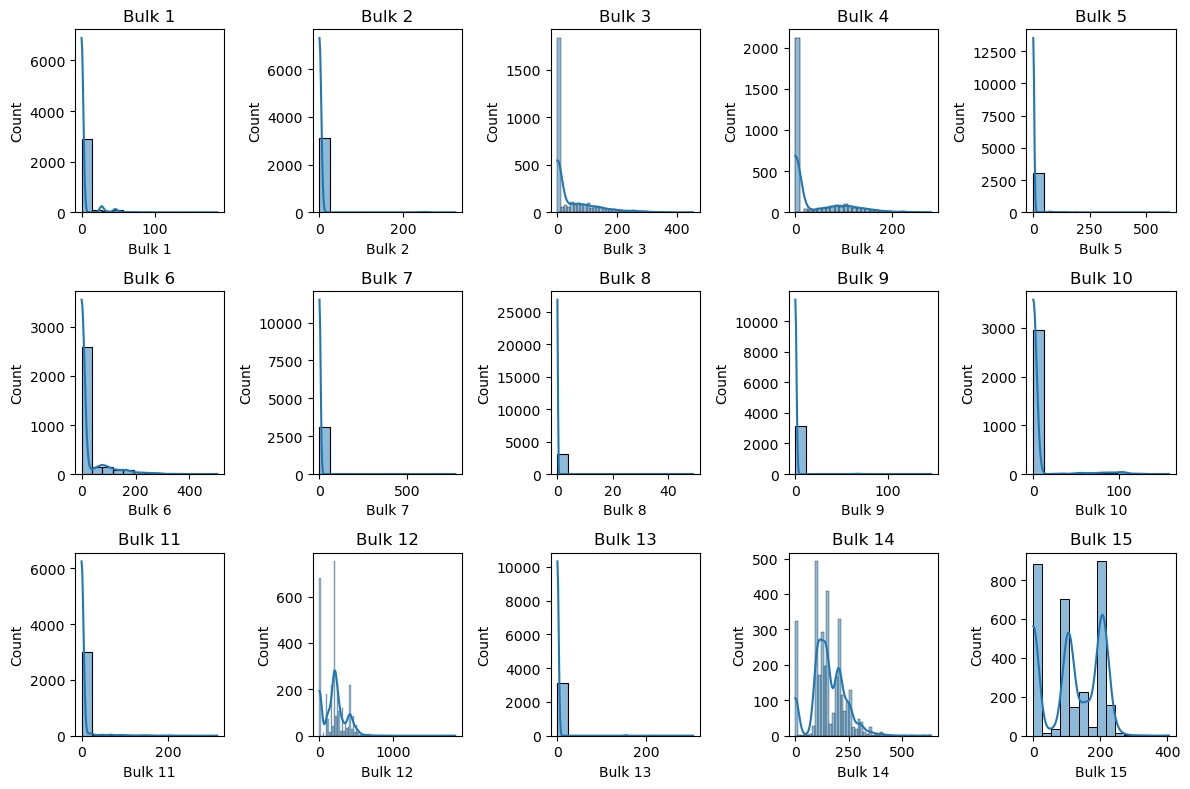

In [ ]:
# Statistik Deskriptif
print(data_bulk.describe())

# Visualisasi Distribusi
plt.figure(figsize=(12, 8))
for i, col in enumerate(data_bulk.columns[1:], 1):
    plt.subplot(3, 5, i)
    sns.histplot(data_bulk[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

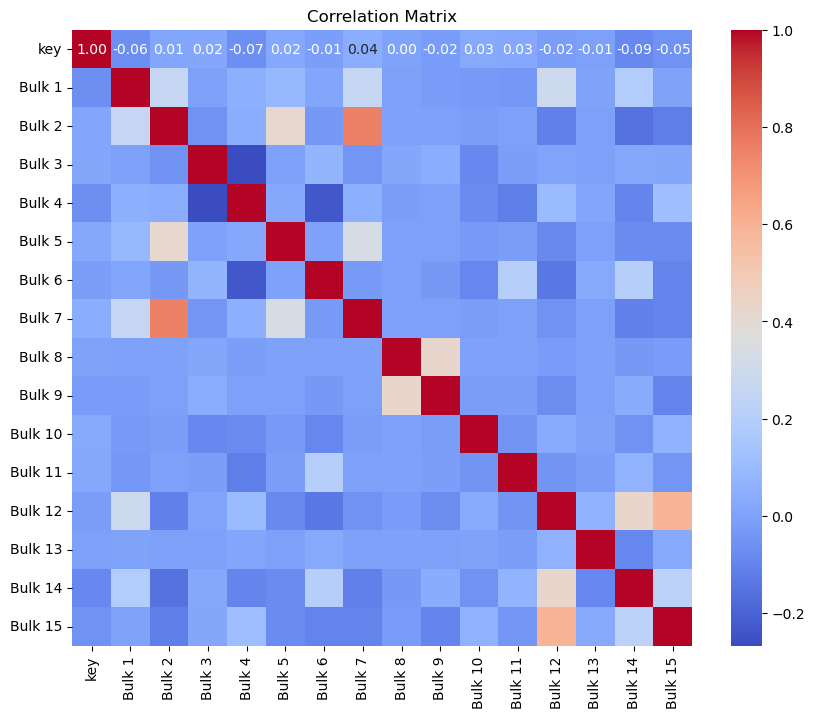

In [ ]:
# Korelasi antar fitur
correlation_matrix = data_bulk.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Menghitung korelasi antar kolom pada data_bulk
correlation_matrix = data_bulk.corr()
# Menampilkan matriks korelasi
print(correlation_matrix)

              key    Bulk 1    Bulk 2    Bulk 3    Bulk 4    Bulk 5    Bulk 6  \
key      1.000000 -0.064900  0.011159  0.015479 -0.067873  0.024842 -0.011109   
Bulk 1  -0.064900  1.000000  0.259609 -0.007222  0.050981  0.088394  0.010362   
Bulk 2   0.011159  0.259609  1.000000 -0.053374  0.043135  0.412000 -0.033091   
Bulk 3   0.015479 -0.007222 -0.053374  1.000000 -0.266968 -0.003587  0.073600   
Bulk 4  -0.067873  0.050981  0.043135 -0.266968  1.000000  0.024622 -0.232814   
Bulk 5   0.024842  0.088394  0.412000 -0.003587  0.024622  1.000000 -0.003383   
Bulk 6  -0.011109  0.010362 -0.033091  0.073600 -0.232814 -0.003383  1.000000   
Bulk 7   0.041140  0.257701  0.757486 -0.043125  0.045005  0.335044 -0.029312   
Bulk 8   0.003097 -0.004762 -0.001500  0.018249 -0.010797 -0.002252 -0.007055   
Bulk 9  -0.020741 -0.020056 -0.006316  0.041242 -0.004691 -0.009483 -0.029715   
Bulk 10  0.026804 -0.026729 -0.019493 -0.087810 -0.078468 -0.029270 -0.091713   
Bulk 11  0.025012 -0.037120 

In [ ]:
# Pencarian pencilan pada data bulk
Q1 = data_bulk.quantile(0.25)
Q3 = data_bulk.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_bulk[(data_bulk < lower_bound) | (data_bulk > upper_bound)].count()
print("Jumlah Pencilan:")
print(outliers)

Jumlah Pencilan:
key          0
Bulk 1     252
Bulk 2      22
Bulk 3     172
Bulk 4      93
Bulk 5      77
Bulk 6     576
Bulk 7      25
Bulk 8       1
Bulk 9      19
Bulk 10    176
Bulk 11    177
Bulk 12    101
Bulk 13     18
Bulk 14     48
Bulk 15      0
dtype: int64


In [ ]:
# Handling pencilan pada data_bulk
data_bulk_no_outliers = data_bulk.copy()
for column in data_bulk_no_outliers.columns[1:]:
    Q1 = data_bulk_no_outliers[column].quantile(0.25)
    Q3 = data_bulk_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_bulk_no_outliers[column] = data_bulk_no_outliers[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

**Note:**
- Variabel Bulk 2 memiliki korelasi yang cukup kuat dengan Bulk 7 (0.757486), Bulk 6 (0.412000), dan Bulk 1 (0.259609).
- Terdapat pencilan pada Bulk 1= 252, Bulk 2= 22, Bulk 3=172, dst.

### Data Waktu Pengiriman bahan Curah (data_bulk_time)

In [ ]:
# Tampilkan sample data
data_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [ ]:
# Informasi data
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.3+ KB


In [ ]:
# Mengubah kolom-kolom yang berisi tanggal dan waktu menjadi tipe data datetime
date_columns = ['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']
data_bulk_time[date_columns] = data_bulk_time[date_columns].apply(pd.to_datetime)

# Menampilkan informasi data setelah pengubahan tipe data
data_bulk_time.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.3 KB


In [ ]:
# Cek Duplikasi Data
print('data duplicate', data_bulk_time.duplicated().sum())

data duplicate 0


In [ ]:
# Mencari Data yang Hilang
data_bulk_time.isnull().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [ ]:
# Persentase data yang hilang
(data_bulk_time.isnull().sum() / len(data_bulk_time)*100).sort_values()

key         0.000000
Bulk 14    10.322787
Bulk 12    21.700224
Bulk 15    28.155960
Bulk 3     58.517098
Bulk 4     67.593480
Bulk 6     81.591563
Bulk 1     91.946309
Bulk 11    94.343241
Bulk 10    94.375200
Bulk 5     97.539150
Bulk 7     99.201023
Bulk 2     99.296900
Bulk 9     99.392777
Bulk 13    99.424736
Bulk 8     99.968041
dtype: float64

In [ ]:
# Mengganti missing values dengan nilai 0 pada data_bulk_time
data_bulk_time.fillna(0, inplace=True)

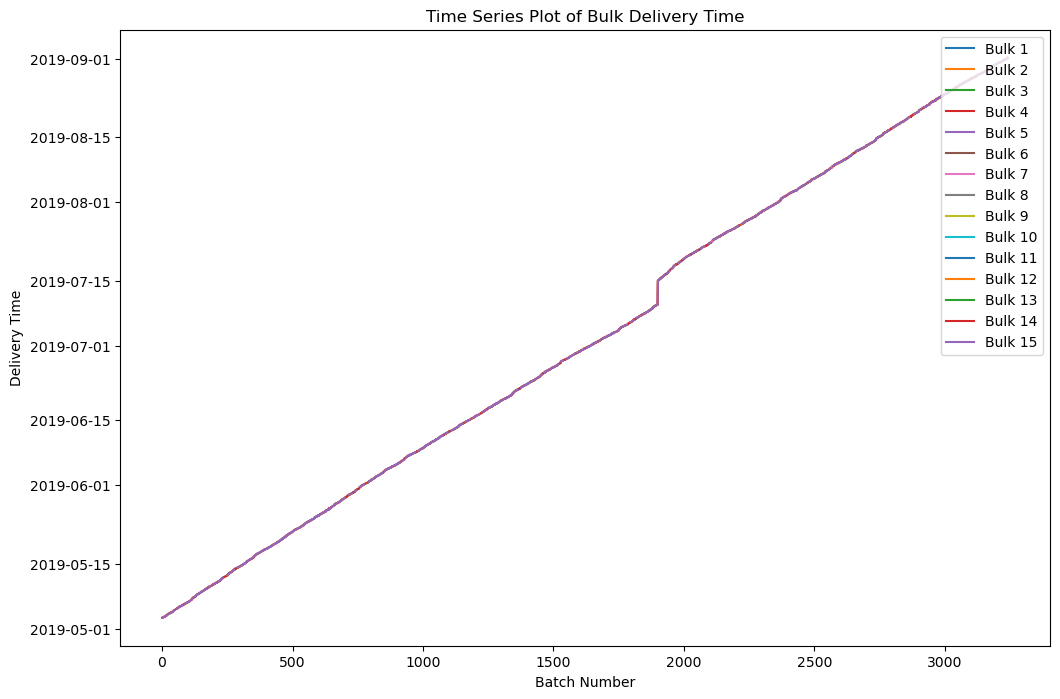

In [ ]:
# Melakukan plotting untuk setiap kolom Bulk (Bulk 1 hingga Bulk 15)
plt.figure(figsize=(12, 8))
for column in data_bulk_time.columns[1:]:
    # Mengonversi nilai waktu menjadi tipe datetime dengan format 'YYYY-MM-DD HH:MM:SS'
    data_bulk_time[column] = pd.to_datetime(data_bulk_time[column], errors='coerce', format='%Y-%m-%d %H:%M:%S')
    # Plot time series untuk setiap kolom Bulk
    plt.plot(data_bulk_time['key'], data_bulk_time[column], label=column)

plt.title('Time Series Plot of Bulk Delivery Time')
plt.xlabel('Batch Number')
plt.ylabel('Delivery Time')
plt.legend(loc='upper right')
plt.show()

**Note 'data_bulk_time':**
- Terdapat banyak missing values
- Tidak ada duplikasi data

In [ ]:
# Pencarian pencilan pada data_bulk_time
Q1 = data_bulk_time.quantile(0.25)
Q3 = data_bulk_time.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_bulk_time[(data_bulk_time < lower_bound) | (data_bulk_time > upper_bound)].count()
print("Jumlah Pencilan:")
print(outliers)

Jumlah Pencilan:
key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     2
Bulk 8     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64


In [ ]:
# Handling pencilan pada data_bulk_time
data_bulk_time_no_outliers = data_bulk_time.copy()
for column in data_bulk_time_no_outliers.columns[1:]:
    Q1 = data_bulk_time_no_outliers[column].quantile(0.25)
    Q3 = data_bulk_time_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_bulk_time_no_outliers[column] = data_bulk_time_no_outliers[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

**Note:**
- Terdapat pencilan pada Bulk 7=2

### Data Pembilasan Gas (data_gas)

In [ ]:
# Tampilkan sample data
data_gas.head()

,key,Gas 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [ ]:
# Informasi data
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Gas 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [ ]:
# Cek Duplikasi Data
print('data duplicate', data_gas.duplicated().sum())

data duplicate 0


In [ ]:
# Mencari Data yang Hilang
data_gas.isnull().sum()

key      0
Gas 1    0
dtype: int64

**Note 'data_gas':**
- Tidak ada missing values
- Tidak ada duplikasi data

In [ ]:
# Statistik Deskriptif
print("Statistik Deskriptif untuk Gas 1:")
print(data_gas['Gas 1'].describe())

Statistik Deskriptif untuk Gas 1:
count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Gas 1, dtype: float64


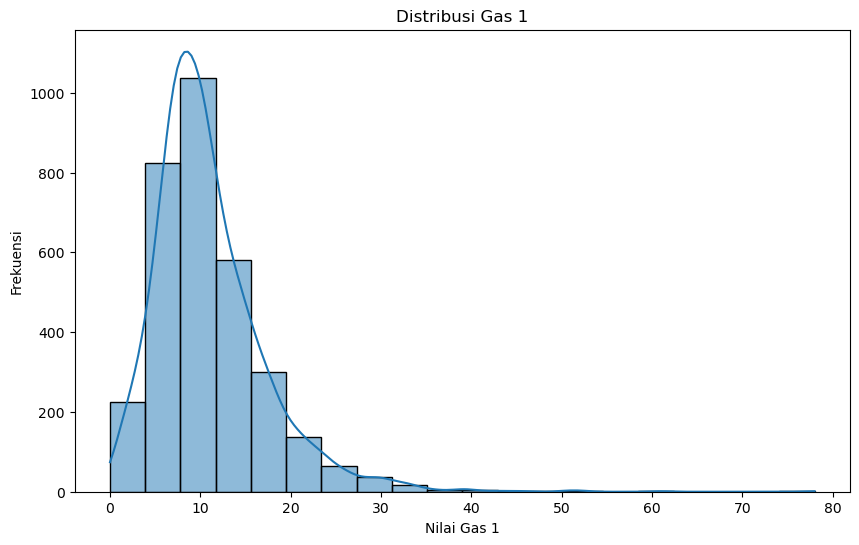

In [ ]:
# Visualisasi Distribusi
plt.figure(figsize=(10, 6))
sns.histplot(data_gas['Gas 1'], bins=20, kde=True)
plt.title('Distribusi Gas 1')
plt.xlabel('Nilai Gas 1')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# Pencarian Pencilan
Q1 = data_gas['Gas 1'].quantile(0.25)
Q3 = data_gas['Gas 1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_gas[(data_gas['Gas 1'] < lower_bound) | (data_gas['Gas 1'] > upper_bound)]
print("Jumlah Pencilan:", len(outliers))

Jumlah Pencilan: 126


In [ ]:
# Handling pencilan pada data_gas
data_gas_no_outliers = data_gas.copy()
for column in data_gas_no_outliers.columns[1:]:
    Q1 = data_gas_no_outliers[column].quantile(0.25)
    Q3 = data_gas_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_gas_no_outliers[column] = data_gas_no_outliers[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

**Note:**
- Berdasarkan statistik deskriptif dan visualisasi distribusi, terlihat bahwa nilai Gas 1 memiliki rata-rata sekitar 11.00 dengan deviasi standar sekitar 6.22. Distribusi datanya menunjukkan bahwa sebagian besar nilai berada di rentang 0 hingga sekitar 15.
- Bacaan grafik: nilai gas 1  dari 0 terus keatas menuju puncak di sekitar koordinat (10,1000) lalu kemudian menurun secara konstan hingga di kordinat akhir di sekitar (78,0)
- Jumlah Pencilan: 126


### Data Hasil Pengukuran Suhu (data_temp)

In [ ]:
# Tampilkan sample data
data_temp.head()

,key,Sampling time,Temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [ ]:
# Informasi data
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            15907 non-null  int64  
 1   Sampling time  15907 non-null  object 
 2   Temperature    13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [ ]:
# Mengonversi tipe data kolom "Sampling time" menjadi datetime
data_temp['Sampling time'] = data_temp['Sampling time'].apply(pd.to_datetime)
# Menampilkan informasi data setelah pengubahan tipe data
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   key            15907 non-null  int64         
 1   Sampling time  15907 non-null  datetime64[ns]
 2   Temperature    13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


In [ ]:
# Cek Duplikasi Data
print('data duplicate', data_temp.duplicated().sum())

data duplicate 0


In [ ]:
# Mencari Data yang Hilang
data_temp.isnull().sum()

key                 0
Sampling time       0
Temperature      2901
dtype: int64

In [ ]:
# Persentase data yang hilang
(data_temp.isnull().sum() / len(data_temp)*100).sort_values()

key               0.000000
Sampling time     0.000000
Temperature      18.237254
dtype: float64

In [ ]:
# Mengganti missing values dengan nilai rata-rata pada data_temp
data_temp['Temperature'].fillna(data_temp['Temperature'].mean(), inplace=True)

**Note 'data_temp':**
- Terdapat banyak missing values
- Tidak ada duplikasi data

In [ ]:
# Statistik Deskriptif
print("Statistik Deskriptif untuk Temperature:")
print(data_temp['Temperature'].describe())

Statistik Deskriptif untuk Temperature:
count    15907.000000
mean      1591.840920
std         19.328498
min       1191.000000
25%       1584.000000
50%       1591.840920
75%       1598.000000
max       1705.000000
Name: Temperature, dtype: float64


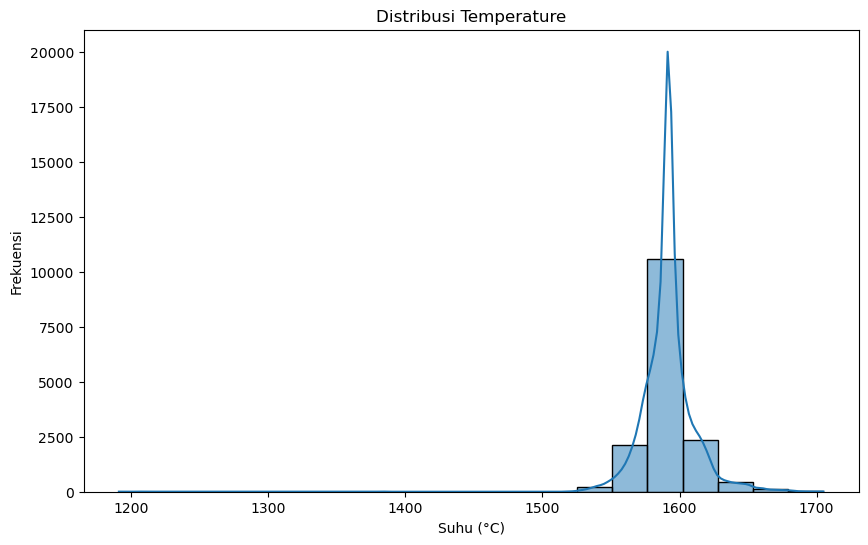

In [ ]:
# Visualisasi Distribusi
plt.figure(figsize=(10, 6))
sns.histplot(data_temp['Temperature'], bins=20, kde=True)
plt.title('Distribusi Temperature')
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# Pencarian Pencilan
Q1_temp = data_temp['Temperature'].quantile(0.25)
Q3_temp = data_temp['Temperature'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp
outliers_temp = data_temp[(data_temp['Temperature'] < lower_bound_temp) | (data_temp['Temperature'] > upper_bound_temp)]
print("Jumlah Pencilan:", len(outliers_temp))

Jumlah Pencilan: 1646


In [ ]:
# Handling pencilan pada data_temp
data_temp_no_outliers = data_temp.copy()
for column in data_temp_no_outliers.columns[1:]:
    if column != 'Sampling time':  # Memastikan kolom bukan 'Sampling time'
        Q1 = data_temp_no_outliers[column].quantile(0.25)
        Q3 = data_temp_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_temp_no_outliers[column] = data_temp_no_outliers[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


**Note:**
- Berdasarkan statistik deskriptif dan visualisasi distribusi suhu, terlihat bahwa sebagian besar data memiliki rentang suhu antara sekitar 1580°C hingga 1590°C.
- Jumlah Pencilan: 1646

### Data Volume Bahan Kawat (data_wire)

In [ ]:
# Tampilkan sample data
data_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Informasi data
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [ ]:
# Cek Duplikasi Data
print('data duplicate', data_wire.duplicated().sum())

data duplicate 0


In [ ]:
# Mencari Data yang Hilang
data_wire.isnull().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

In [ ]:
# Persentase data yang hilang
(data_wire.isnull().sum() / len(data_wire)*100).sort_values()

key        0.000000
Wire 1     0.843882
Wire 2    64.978903
Wire 6    97.630639
Wire 3    97.955209
Wire 9    99.058747
Wire 8    99.383317
Wire 4    99.545602
Wire 7    99.642973
Wire 5    99.967543
dtype: float64

In [ ]:
# Mengisi semua missing values dengan 0
data_wire.fillna(0, inplace=True)

**Note 'data_wire':**
- Terdapat banyak missing values
- Tidak ada duplikasi data

In [ ]:
# Statistik Deskriptif
print("Statistik Deskriptif untuk Data Wire:")
print(data_wire.describe())

Statistik Deskriptif untuk Data Wire:
               key       Wire 1       Wire 2       Wire 3       Wire 4  \
count  3081.000000  3081.000000  3081.000000  3081.000000  3081.000000   
mean   1623.426485   100.044411    17.712733     3.874524     0.261019   
std     932.996726    42.841120    33.517734    30.310417     4.293865   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     823.000000    70.281120     0.000000     0.000000     0.000000   
50%    1619.000000   100.114563     0.000000     0.000000     0.000000   
75%    2434.000000   125.798405    23.162880     0.000000     0.000000   
max    3241.000000   330.314424   282.780152   385.008668   113.231044   

            Wire 5       Wire 6       Wire 7       Wire 8       Wire 9  
count  3081.000000  3081.000000  3081.000000  3081.000000  3081.000000  
mean      0.004911     1.137695     0.035842     0.330697     0.321492  
std       0.272615     8.958111     0.774190     4.392677     3.806904  
min

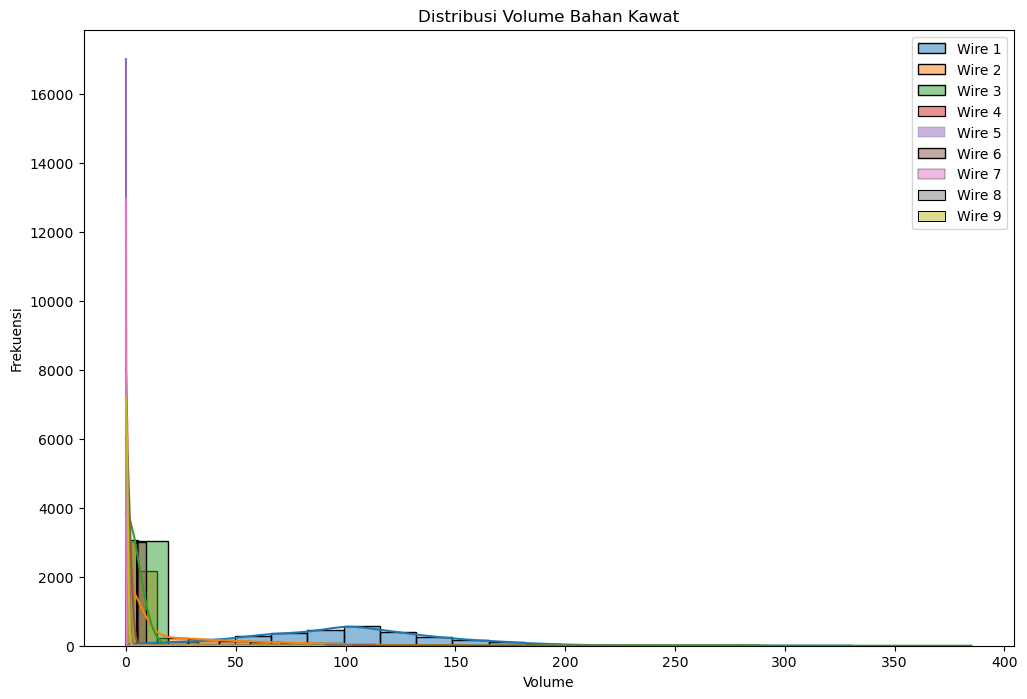

In [ ]:
# Visualisasi Distribusi
plt.figure(figsize=(12, 8))
for column in data_wire.columns[1:]:
    sns.histplot(data_wire[column], bins=20, kde=True, label=column)
plt.title('Distribusi Volume Bahan Kawat')
plt.xlabel('Volume')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

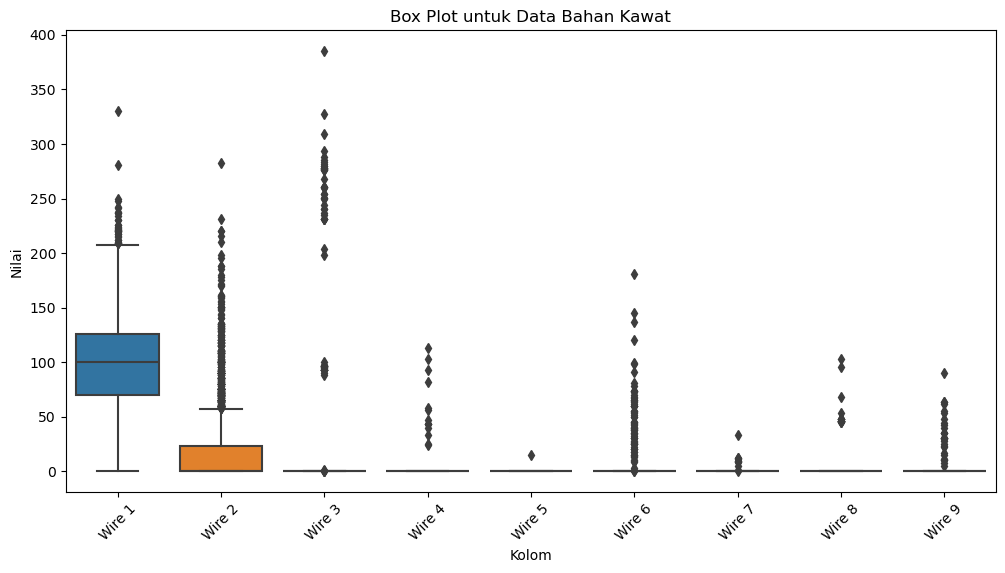

In [ ]:
# Visualisasi box plot untuk setiap kolom
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_wire.drop(columns=['key']))
plt.xticks(rotation=45)
plt.title('Box Plot untuk Data Bahan Kawat')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.show()

In [ ]:
# Pencarian Pencilan
Q1 = data_wire.quantile(0.25)
Q3 = data_wire.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_wire[(data_wire < lower_bound) | (data_wire > upper_bound)].count()
print("Jumlah Pencilan:")
print(outliers)

Jumlah Pencilan:
key         0
Wire 1     33
Wire 2    370
Wire 3     63
Wire 4     14
Wire 5      1
Wire 6     73
Wire 7     11
Wire 8     19
Wire 9     29
dtype: int64


In [ ]:
# Handling pencilan pada data_wire
data_wire_no_outliers = data_wire.copy()
for column in data_wire_no_outliers.columns[1:]:
    Q1 = data_wire_no_outliers[column].quantile(0.25)
    Q3 = data_wire_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_wire_no_outliers[column] = data_wire_no_outliers[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

**Note:**
- Dari hasil statistik deskriptif dan pencarian pencilan, terlihat bahwa sebagian besar fitur wire memiliki banyak nilai nol, dengan sedikit nilai yang berbeda dari nol, dan beberapa pencilan.
- Jumlah Pencilan ada berbagai macam, misalnya: Wire 1=33, Wire 2 = 370, Wire 3 = 63, dst.

### Data Waktu bahan Kawat (data_wire_time)

In [ ]:
# Tampilkan sample data
data_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Informasi data
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [ ]:
# Mengubah kolom-kolom yang berisi tanggal dan waktu menjadi tipe data datetime
date_columns = ['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9']
data_wire_time[date_columns] = data_wire_time[date_columns].apply(pd.to_datetime)

# Menampilkan informasi data setelah pengubahan tipe data
data_wire_time.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [ ]:
# Cek Duplikasi Data
print('data duplicate', data_wire_time.duplicated().sum())

data duplicate 0


In [ ]:
# Mencari Data yang Hilang
data_wire_time.isnull().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

In [ ]:
# Persentase data yang hilang
(data_wire_time.isnull().sum() / len(data_wire_time)*100).sort_values()

key        0.000000
Wire 1     0.843882
Wire 2    64.978903
Wire 6    97.630639
Wire 3    97.955209
Wire 9    99.058747
Wire 8    99.383317
Wire 4    99.545602
Wire 7    99.642973
Wire 5    99.967543
dtype: float64

In [ ]:
# Mengganti missing values dengan nilai nol
data_wire_time.fillna(0, inplace=True)

**Note 'data_wire_time':**
- Terdapat banyak missing values
- Tidak ada duplikasi data

In [ ]:
# Statistik Deskriptif
print("Statistik Deskriptif untuk Data Wire Time:")
print(data_wire_time.describe())

Statistik Deskriptif untuk Data Wire Time:
               key
count  3081.000000
mean   1623.426485
std     932.996726
min       1.000000
25%     823.000000
50%    1619.000000
75%    2434.000000
max    3241.000000


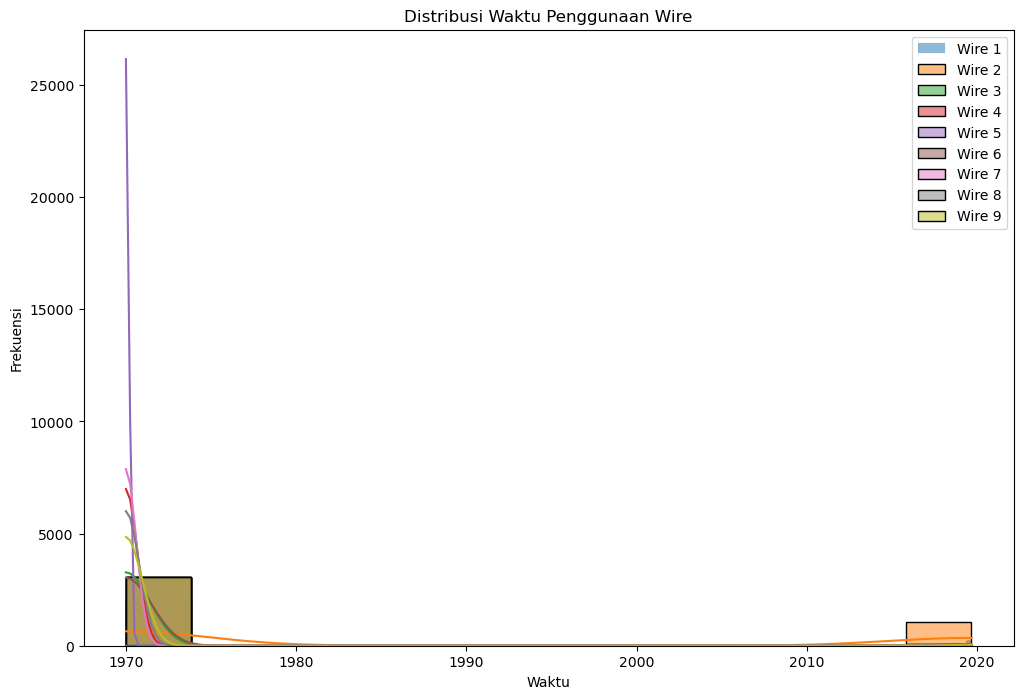

In [ ]:
# Visualisasi Distribusi untuk masing-masing fitur
plt.figure(figsize=(12, 8))
for column in data_wire_time.columns[1:]:
    # Mengonversi nilai waktu menjadi tipe datetime jika diperlukan
    data_wire_time[column] = pd.to_datetime(data_wire_time[column], errors='coerce')
    # Plot time series untuk setiap fitur Wire
    sns.histplot(data_wire_time[column].dropna(), kde=True, label=column)
plt.title('Distribusi Waktu Penggunaan Wire')
plt.xlabel('Waktu')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [ ]:
# Pencarian Pencilan untuk masing-masing fitur
Q1_wire_time = data_wire_time.drop(columns=['key']).quantile(0.25)
Q3_wire_time = data_wire_time.drop(columns=['key']).quantile(0.75)
IQR_wire_time = Q3_wire_time - Q1_wire_time
lower_bound_wire_time = Q1_wire_time - 1.5 * IQR_wire_time
upper_bound_wire_time = Q3_wire_time + 1.5 * IQR_wire_time
outliers_wire_time = ((data_wire_time.drop(columns=['key']) < lower_bound_wire_time) |
                      (data_wire_time.drop(columns=['key']) > upper_bound_wire_time)).sum()
print("Jumlah Pencilan:")
print(outliers_wire_time)

Jumlah Pencilan:
Wire 1    26
Wire 2     0
Wire 3    63
Wire 4    14
Wire 5     1
Wire 6    73
Wire 7    11
Wire 8    19
Wire 9    29
dtype: int64


In [ ]:
# Mengganti pencilan dengan nilai batas bawah dan atas dari IQR
data_wire_time_no_outliers = data_wire_time.copy()
for column in data_wire_time_no_outliers.columns[1:]:
    # Hitung Q1 dan Q3
    Q1 = data_wire_time_no_outliers[column].quantile(0.25)
    Q3 = data_wire_time_no_outliers[column].quantile(0.75)
    # Hitung IQR
    IQR = Q3 - Q1
    # Tentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Ganti nilai pencilan
    data_wire_time_no_outliers[column] = data_wire_time_no_outliers[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


**Note:**
- Dari hasil statistik deskriptif dan pencarian pencilan, terlihat bahwa distribusi waktu penggunaan wire menunjukkan variasi dalam frekuensi penggunaan unutk setiap fitur wire.
- Jumlah Pencilan ada berbagai macam, misalnya: Wire 3 = 63, Wire 4 = 14, Wire 5 = 1, dst.

## Pembuatan Model

In [ ]:
# Impor library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

### Persiapan Data dan Pembuatan Model

In [ ]:
# Fungsi untuk mengagregasi dan membersihkan data
def aggregate_and_clean(data_list):
    # Mengagregasi dataframe
    data_agg_list = []
    for data in data_list:
        data_agg = data.groupby('key').agg('mean').reset_index()
        data_agg_list.append(data_agg)

    # Menggabungkan dataframe yang sudah diagregasi menjadi dataframe tunggal
    data_combined = data_agg_list[0]
    for i in range(1, len(data_agg_list)):
        data_combined = data_combined.merge(data_agg_list[i], on='key')

    # Hapus kolom-kolom datetime dari dataframe hasil penggabungan
    datetime_columns = data_combined.select_dtypes(include=['datetime64']).columns
    if not datetime_columns.empty:
        data_combined.drop(columns=datetime_columns, inplace=True)

    return data_combined

# List data dari dataframe
data_list = [data_arc_no_outliers, data_bulk_no_outliers, data_bulk_time_no_outliers, data_gas_no_outliers, data_temp_no_outliers, data_wire_no_outliers, data_wire_time_no_outliers]

# Panggil fungsi aggregate_and_clean dengan data_list sebagai argumen
data_combined = aggregate_and_clean(data_list)


In [ ]:
# Tampilkan info data_combined
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             3022 non-null   int64  
 1   Active power    3022 non-null   float64
 2   Reactive power  3022 non-null   float64
 3   Bulk 1_x        3022 non-null   float64
 4   Bulk 2_x        3022 non-null   float64
 5   Bulk 3_x        3022 non-null   float64
 6   Bulk 4_x        3022 non-null   float64
 7   Bulk 5_x        3022 non-null   float64
 8   Bulk 6_x        3022 non-null   float64
 9   Bulk 7_x        3022 non-null   float64
 10  Bulk 8_x        3022 non-null   float64
 11  Bulk 9_x        3022 non-null   float64
 12  Bulk 10_x       3022 non-null   float64
 13  Bulk 11_x       3022 non-null   float64
 14  Bulk 12_x       3022 non-null   float64
 15  Bulk 13_x       3022 non-null   float64
 16  Bulk 14_x       3022 non-null   float64
 17  Bulk 15_x       3022 non-null   f

In [ ]:
# Cek Duplikasi Data di data_combined
print('Jumlah data duplikat:', data_combined.duplicated().sum())


Jumlah data duplikat: 0


In [ ]:
# Persiapan data
X = data_combined.drop(columns=['Temperature'])  # Fitur
y = data_combined['Temperature']  # Target


In [ ]:
# Pembagian data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Print Ukuran data pelatihan dan data pengujian
print("\nUkuran data pelatihan:", X_train.shape, y_train.shape)
print("Ukuran data pengujian:", X_test.shape, y_test.shape)


Ukuran data pelatihan: (2417, 28) (2417,)
Ukuran data pengujian: (605, 28) (605,)


### Model Decision Tree

In [ ]:
# Inisialisasi model Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
# Latih model Decision Tree
dt_model.fit(X_train, y_train)
# Prediksi menggunakan model Decision Tree
dt_pred = dt_model.predict(X_test)
# Hitung MAE untuk model Decision Tree
dt_mae = mean_absolute_error(y_test, dt_pred)
# Tampilkan MAE Decision Tree
print("MAE Decision Tree:", dt_mae)

MAE Decision Tree: 9.075976395980154


### Model Random Forest

In [ ]:
# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Latih model Random Forest
rf_model.fit(X_train, y_train)
# Prediksi menggunakan model Random Forest
rf_pred = rf_model.predict(X_test)
# Hitung MAE untuk model Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
# Tampilkan MAE Random Forest
print("MAE Random Forest:", rf_mae)

MAE Random Forest: 6.370670035119394


### Model Linear Regression

In [ ]:
# Inisialisasi model Linear Regression
lr_model = LinearRegression()
# Latih model Linear Regression
lr_model.fit(X_train, y_train)
# Prediksi menggunakan model Linear Regression
lr_pred = lr_model.predict(X_test)
# Hitung MAE untuk model Linear Regression
lr_mae = mean_absolute_error(y_test, lr_pred)
# Tampilkan MAE Linear Regression
print("MAE Linear Regression:", lr_mae)

MAE Linear Regression: 6.68091592003914


### Model SVR (Support Vector Regression)

In [ ]:
# Inisialisasi dan latih model SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
# Prediksi suhu menggunakan model SVR
y_pred_svr = svr.predict(X_test)
# Hitung MAE
mae_svr = mean_absolute_error(y_test, y_pred_svr)
# Tampilkan MAE SVR (Support Vector Regression)
print("MAE Support Vector Regression:", mae_svr)

MAE Support Vector Regression: 6.712834566584357


### Membandingkan Hasil MAE

In [ ]:
# Bandingkan MAE dari keempat model
print("MAE Decision Tree:", dt_mae)
print("MAE Random Forest:", rf_mae)
print("MAE Linear Regression:", lr_mae)
print("MAE Support Vector Regression:", mae_svr)

MAE Decision Tree: 9.075976395980154
MAE Random Forest: 6.370670035119394
MAE Linear Regression: 6.68091592003914
MAE Support Vector Regression: 6.712834566584357


**Note:**
- Hasil dari membandingkan keempat model didapatkan model dengan kinerja terbaik adalah Random Forest dengan nilai MAE Random Forest: 6.37

### Optimasi Model Terbaik

In [ ]:
# Optimasi Model Terbaik (Random Forest)
print("\nOptimasi Model Terbaik (Random Forest):")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
best_rf_pred = best_rf_model.predict(X_test)
best_rf_mae = mean_absolute_error(y_test, best_rf_pred)
print("Best MAE Random Forest:", best_rf_mae)


Optimasi Model Terbaik (Random Forest):
Best MAE Random Forest: 6.315265470955978


**Note:**
- Optimasi model terbaik (Random Forest) dapat menghasilkan score MAE yang lebih kecil dari sebelumnya, yaitu dengan score Best MAE Random Forest: 6.31

### Kesimpulan Pembuatan Model
- Nilai MAE terbaik yang didapatkan menggunakan model Random Forest dengan nilai score 6.31.

## Laporan Tugas dengan Evaluasi Model Terbaik dan Kesimpulan Umum

**󠀰Mohon sertakan jawaban atas pertanyaan-pertanyaan berikut dalam laporanmu:󠀲󠀡󠀠󠀥󠀨󠀢󠀦󠀣󠀳**
- Berdasarkan rencana kerja, langkah-langkah apa saja yang telah kamu lakukan dan langkah-langkah apa saja yang kamu lewati (jelaskan alasannya)?
- Kesulitan apa saja yang kamu temui dan bagaimana kamu mengatasinya?󠀲󠀡󠀠󠀥󠀨󠀢󠀦󠀥󠀳
- Langkah kunci apa saja yang kamu lakukan untuk menyelesaikan tugas ini?󠀲󠀡󠀠󠀥󠀨󠀢󠀦󠀦󠀳
- Apa model akhirmu dan berapa skor kualitasnya?

### Laporan Tugas dengan Evaluasi Model Terbaik

In [ ]:
# Jumlah data dalam X_train dan y_train
jumlah_data_X_train = X_train.shape[0]
jumlah_data_y_train = y_train.shape[0]

print("Jumlah data dalam X_train:", jumlah_data_X_train)
print("Jumlah data dalam y_train:", jumlah_data_y_train)

Jumlah data dalam X_train: 2417
Jumlah data dalam y_train: 2417


In [ ]:
# Menggunakan subset dari data latih sebagai data uji tambahan
X_train_subset = X_train[:1000]  # Ambil 1000 sampel pertama dari data latih sebagai data uji tambahan
y_train_subset = y_train[:1000]  # Ambil target yang sesuai dengan subset data uji tambahan

In [ ]:
# Prediksi pada subset data uji tambahan
best_rf_pred_additional = best_rf_model.predict(X_train_subset)
best_rf_mae_additional = mean_absolute_error(y_train_subset, best_rf_pred_additional)
print("MAE pada Subset Data Uji Tambahan:", best_rf_mae_additional)

MAE pada Subset Data Uji Tambahan: 2.941126156033255


**Note:**
- Evaluasi model terbaik dengan menggunakan 1000 sample data pertama sebagai data uji tambahan (subset data uji), didapatkan nilai MAE 2.941126156033255.

### Kesimpulan Umum

**Rencana Kerja:**

Berdasarkan rencana kerja hingga pembuatan model yang telah dibuat yang bertujuan untuk mengoptimalkan biaya produksi pabrik baja Steelproof, berikut adalah langkah-langkah kerja yang telah dilakukan:
1. Buka File Data, Pelajari, dan EDA:
   - Pada tahap ini dilakukan pemuatan dataset dari keseluruhan data (ada 7 dataset, yaitu data_arc, data_bulk, data_bulk_time, data_gas, data_wire, dan data_wire_time).
   - Setelah memuat data dilakukan pre-processing data dengan tujuan untuk membersihkan data, melakukan penanganan terhadap nilai yang hilang.
   - Setelah itu dilanjutkan dengan EDA termasuk dengan visualisasi data dengan berbagai macam plot grafik.
3. Pembuatan Model:
   - Pada tahap pembuatan model, saya mencoba membuat dengan 4 model machine learning, yaitu model Decision Tree, Random Forest, Linear Regression, dan juga Support Vector Regression (SVR).
   - Hasil dari membandingkan keempat model didapatkan model dengan kinerja terbaik adalah Random Forest dengan nilai MAE Random Forest: 6.37
   - Setelah mendapatkan model terbaik, saya mencoba untuk mengoptimasi model terbaik tersebut dengan setting hyperparameter.
   - Optimasi model terbaik (Random Forest) dapat menghasilkan score MAE yang lebih kecil dari sebelumnya, yaitu dengan score Best MAE Random Forest: 6.31
5. Laporan Tugas dengan Evaluasi Model Terbaik dan Kesimpulan Umum:
    - Memberikan laporan tugas dengan mengevaluasi model terbaik dengan menggunakan 1000 sample pertama subset data uji tambahan.
    - Membuat rekap hasil kesimpulan umumnya dari seluruh proses pembuatan machine learning.

**Kesulitan yang Dihadapi dan Solusinya:**

- Kesulitan memilih model terbaik yang memberikan performa yang optimal.

Solusi:

- Melakukan pembandingan performa model menggunakan metrik yang sesuai, dalam hal ini menggunakan metrik Mean Absolute Error (MAE).
-
Melakukan optimasi hyperparameter pada model terbaik untuk meningkatkan perform kerja dari model..

**Langkah Kunci yang Dilakukan:**

Langkah kunci yang dilakukan untuk menyelesaikan tugas/case Perusahaan Steelproof ini meliputi:

- Pemrosesan dan pembersihan data untuk persiapan pembuatan model
- Pemilihan fitur dan target yang sesuai
- Pembagian data menjadi data pelatihan dan data pengujian
- Pembuatan, pelatihan, dan evaluasi beberapa model
- Optimasi hyperparameter pada model terbaik untuk peningkatan kinerja model.rma.

**Model Akhir dan Skor Kualitas**
- Model akhir yang dipilih adalah model Random Forest setelah proses hyperparameter menggunakan GridSearchCV. Skor kualitas dari model ini adalah Mean Absolute Error (MAE) sebesar 6.31
- Setelah mendapatkan model terbaik, model di evaluasi kembali dengan menggunakan 1000 sample pertama data uji tambahan (subset data uji), dan didapatkan nilai Mean Absolute Error (MAE) sebesar 2.94